## Define Polynomial Kernel 

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Load and preprocess the dataset
file_path = '/Users/raphaelyana/Desktop/COMP78 - Supervised Learning/CW2/zipcombo.dat'

def load_dataset(file_path):
    with open(file_path, 'r') as file:
        data_lines = file.readlines()

    # Split the data into rows and columns
    processed_data = [list(map(float, line.strip().split())) for line in data_lines]
    df = pd.DataFrame(processed_data)

    # Separate labels and features
    labels = df.iloc[:, 0].to_numpy()
    features = df.iloc[:, 1:].to_numpy()

    return features, labels

features, labels = load_dataset(file_path)

def polynomial_kernel(x, y, degree):
    return (np.dot(x, y.T) + 1) ** degree

# Optimized kernel perceptron implementation for multi-class
class MultiClassKernelPerceptron:
    def __init__(self, num_classes, kernel, degree, max_epochs):
        self.num_classes = num_classes
        self.kernel = kernel
        self.degree = degree
        self.max_epochs = max_epochs
        self.alphas = None

    def train(self, X, y):
        n_samples = X.shape[0]
        self.alphas = np.zeros((self.num_classes, n_samples))
        kernel_matrix = self.kernel(X, X, self.degree)

        for c in range(self.num_classes):
            y_binary = np.where(y == c, 1, -1)
            for epoch in range(self.max_epochs):
                for i in range(n_samples):
                    prediction = np.sign(np.dot(self.alphas[c], kernel_matrix[:, i]))
                    if prediction != y_binary[i]:
                        self.alphas[c, i] += y_binary[i]

    def predict(self, X_test, X_train):
        test_kernel_matrix = self.kernel(X_test, X_train, self.degree)
        scores = np.dot(test_kernel_matrix, self.alphas.T)
        return np.argmax(scores, axis=1)

/Users/raphaelyana/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Question 3 Basic results: 20 runs for polynomial kernel

In [44]:
# Arrays to store results
results = []
all_predictions = {}
all_test_labels = {}

max_epochs = 5

for degree in range(1, 8):
    train_errors = []
    test_errors = []
    first_10_predictions = []
    first_10_labels = []

    for run in range(20):
        print(f"Degree {degree}, Run {run + 1}")

        # Split dataset into training and testing sets
        train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=run)

        # Train the perceptron model
        num_classes = len(np.unique(train_labels))
        perceptron = MultiClassKernelPerceptron(num_classes, polynomial_kernel, degree, max_epochs)
        perceptron.train(train_features, train_labels)

        # Compute train and test errors
        train_predictions = perceptron.predict(train_features, train_features)
        test_predictions = perceptron.predict(test_features, train_features)
        train_error = np.mean(train_predictions != train_labels)
        test_error = np.mean(test_predictions != test_labels)

        # Store the first 10 predictions and labels of the first run for each degree
        if run == 0:
            first_10_predictions.append(test_predictions[:10])
            first_10_labels.append(test_labels[:10])

        train_errors.append(train_error)
        test_errors.append(test_error)

    # Compute mean and standard deviation for train and test errors
    mean_train_error = np.mean(train_errors)
    std_train_error = np.std(train_errors)
    mean_test_error = np.mean(test_errors)
    std_test_error = np.std(test_errors)

    results.append((degree, mean_train_error, std_train_error, mean_test_error, std_test_error))
    all_predictions[degree] = first_10_predictions[0] if first_10_predictions else []
    all_test_labels[degree] = first_10_labels[0] if first_10_labels else []

# Display results
print("\nFinal Results:")
print("Degree\tTrain Error (Mean ± Std)\tTest Error (Mean ± Std)")
for degree, mean_train, std_train, mean_test, std_test in results:
    print(f"{degree}\t{mean_train:.4f} ± {std_train:.4f}\t{mean_test:.4f} ± {std_test:.4f}")

# Print first 10 predictions and original labels for each degree
print("\nFirst 10 Predictions and Original Labels for Each Degree:")
for degree in all_predictions.keys():
    print(f"Degree {degree}:")
    print(f"Original Labels: {all_test_labels[degree]}")
    print(f"Predictions:     {all_predictions[degree]}")


Degree 1, Run 1
Degree 1, Run 2
Degree 2, Run 1
Degree 2, Run 2
Degree 3, Run 1
Degree 3, Run 2
Degree 4, Run 1
Degree 4, Run 2
Degree 5, Run 1
Degree 5, Run 2
Degree 6, Run 1
Degree 6, Run 2
Degree 7, Run 1
Degree 7, Run 2

Final Results:
Degree	Train Error (Mean ± Std)	Test Error (Mean ± Std)
1	0.0843 ± 0.0097	0.0946 ± 0.0070
2	0.0084 ± 0.0018	0.0349 ± 0.0070
3	0.0011 ± 0.0002	0.0272 ± 0.0030
4	0.0008 ± 0.0004	0.0309 ± 0.0030
5	0.0003 ± 0.0000	0.0263 ± 0.0005
6	0.0003 ± 0.0001	0.0301 ± 0.0011
7	0.0003 ± 0.0003	0.0306 ± 0.0022

First 10 Predictions and Original Labels for Each Degree:
Degree 1:
Original Labels: [1. 9. 2. 2. 8. 9. 4. 5. 7. 1.]
Predictions:     [1 9 2 8 8 9 4 5 7 1]
Degree 2:
Original Labels: [1. 9. 2. 2. 8. 9. 4. 5. 7. 1.]
Predictions:     [1 9 2 8 8 9 4 5 7 1]
Degree 3:
Original Labels: [1. 9. 2. 2. 8. 9. 4. 5. 7. 1.]
Predictions:     [1 9 2 1 8 9 4 5 7 1]
Degree 4:
Original Labels: [1. 9. 2. 2. 8. 9. 4. 5. 7. 1.]
Predictions:     [1 9 2 1 8 9 4 5 7 1]
Degree 5:
Origi

## Question 4 & 5

In [9]:
from sklearn.model_selection import KFold, train_test_split

# Parameters
degree_values = [1, 2, 3, 4, 5, 6, 7]
max_epochs = 5

# Arrays to store results
train_errors = []
test_errors = []
best_degrees = []
all_confusion_matrices = []

for run in range(20):  # Adjust the number of runs as needed
    print(f"Run {run + 1}")
    # Split dataset into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=run)

    # Cross-validation setup
    kf = KFold(n_splits=5)
    best_degree = None
    best_cv_error = float('inf')

    # Perform cross-validation
    for degree in degree_values:
        cv_errors = []

        for train_index, val_index in kf.split(train_features):
            cv_train_features, cv_val_features = train_features[train_index], train_features[val_index]
            cv_train_labels, cv_val_labels = train_labels[train_index], train_labels[val_index]

            # Train the perceptron model
            num_classes = len(np.unique(train_labels))
            perceptron = MultiClassKernelPerceptron(num_classes, polynomial_kernel, degree, max_epochs)
            perceptron.train(cv_train_features, cv_train_labels)

            # Predict on validation set
            y_val_pred = perceptron.predict(cv_val_features, cv_train_features)
            cv_error = np.mean(y_val_pred != cv_val_labels)
            cv_errors.append(cv_error)

        # Compute mean CV error for this degree
        mean_cv_error = np.mean(cv_errors)
        if mean_cv_error < best_cv_error:
            best_cv_error = mean_cv_error
            best_degree = degree

    # Train on the entire training set with the best degree
    perceptron = MultiClassKernelPerceptron(num_classes, polynomial_kernel, best_degree, max_epochs)
    perceptron.train(train_features, train_labels)

    # Compute train and test errors
    train_predictions = perceptron.predict(train_features, train_features)
    test_predictions = perceptron.predict(test_features, train_features)
    train_error = np.mean(train_predictions != train_labels)
    test_error = np.mean(test_predictions != test_labels)

    train_errors.append(train_error)
    test_errors.append(test_error)
    best_degrees.append(best_degree)

    print(f"Run {run + 1}: Best degree = {best_degree}, Train Error = {train_error:.4f}, Test Error = {test_error:.4f}")
    
    test_labels = test_labels.astype(int)
    test_predictions = test_predictions.astype(int)
    
    # Confusion matrix calculation
    confusion_matrix = np.zeros((10, 10))
    for true_label, predicted_label in zip(test_labels, test_predictions):
        confusion_matrix[true_label, predicted_label] += 1

    # Normalize the confusion matrix row-wise
    for i in range(10):
        total_points = np.sum(confusion_matrix[i, :])
        if total_points > 0:
            confusion_matrix[i, :] /= total_points
    # Set diagonal entries to zero
    np.fill_diagonal(confusion_matrix, 0)

    all_confusion_matrices.append(confusion_matrix)

# Compute mean and standard deviation of confusion matrices
all_confusion_matrices = np.array(all_confusion_matrices)
mean_confusion_matrix = np.mean(all_confusion_matrices, axis=0)
std_confusion_matrix = np.std(all_confusion_matrices, axis=0)

# Print summary results
print("\nSummary of 20 Runs:")
print(f"Mean Train Error: {np.mean(train_errors):.4f} ± {np.std(train_errors):.4f}")
print(f"Mean Test Error: {np.mean(test_errors):.4f} ± {np.std(test_errors):.4f}")
print(f"Mean Best degree: {np.mean(best_degrees):.4f} ± {np.std(best_degrees):.4f}")

# Print confusion matrix with standard deviations
print("\nAveraged Confusion Matrix with Standard Deviations (over 20 runs):")
for i in range(10):
    row = ""
    for j in range(10):
        mean_value = mean_confusion_matrix[i, j] * 100  
        std_value = std_confusion_matrix[i, j] * 100  
        row += f"{mean_value:.2f}% ± {std_value:.2f}%\t"
    print(row)


Run 1
Run 1: Best degree = 5, Train Error = 0.0003, Test Error = 0.0258
Run 2
Run 2: Best degree = 7, Train Error = 0.0005, Test Error = 0.0328
Run 3
Run 3: Best degree = 5, Train Error = 0.0008, Test Error = 0.0306
Run 4
Run 4: Best degree = 6, Train Error = 0.0003, Test Error = 0.0285
Run 5
Run 5: Best degree = 5, Train Error = 0.0003, Test Error = 0.0247
Run 6
Run 6: Best degree = 5, Train Error = 0.0005, Test Error = 0.0301
Run 7
Run 7: Best degree = 4, Train Error = 0.0008, Test Error = 0.0323
Run 8
Run 8: Best degree = 5, Train Error = 0.0004, Test Error = 0.0253
Run 9
Run 9: Best degree = 6, Train Error = 0.0003, Test Error = 0.0258
Run 10
Run 10: Best degree = 6, Train Error = 0.0003, Test Error = 0.0301
Run 11
Run 11: Best degree = 5, Train Error = 0.0007, Test Error = 0.0290
Run 12
Run 12: Best degree = 6, Train Error = 0.0005, Test Error = 0.0285
Run 13
Run 13: Best degree = 6, Train Error = 0.0003, Test Error = 0.0306
Run 14
Run 14: Best degree = 5, Train Error = 0.0005, Te

# Question 6 Hard-to-predict samples

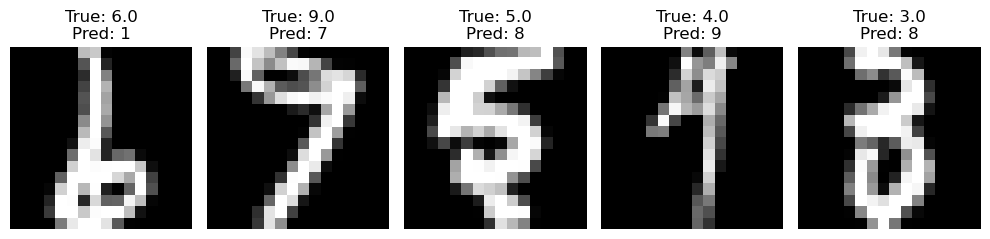

In [8]:
import matplotlib.pyplot as plt

def plot_hard_to_predict_samples(hard_samples, true_labels, predicted_labels):
    plt.figure(figsize=(10, 5))
    for i, (image, true_label, predicted_label) in enumerate(zip(hard_samples, true_labels, predicted_labels)):
        plt.subplot(1, 5, i + 1)
        plt.imshow(image.reshape(16, 16), cmap="gray")  # Assuming images are 16x16 pixels
        plt.title(f"True: {true_label}\nPred: {predicted_label}")
        plt.axis("off")
    plt.tight_layout()
    plt.show()

# Parameters
degree = 5  # Choose an optimal degree for the polynomial kernel
max_epochs = 5

# Split dataset into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=42)

# Train the perceptron model
num_classes = len(np.unique(train_labels))
perceptron = MultiClassKernelPerceptron(num_classes, polynomial_kernel, degree, max_epochs)
perceptron.train(train_features, train_labels)

# Predict on the test set
test_predictions = perceptron.predict(test_features, train_features)

# Find misclassified samples
misclassified_indices = np.where(test_predictions != test_labels)[0]
misclassified_images = test_features[misclassified_indices]
misclassified_true_labels = test_labels[misclassified_indices]
misclassified_predicted_labels = test_predictions[misclassified_indices]

# Select the first five misclassified samples for visualization
hard_to_predict_samples = misclassified_images[:5]
hard_to_predict_true_labels = misclassified_true_labels[:5]
hard_to_predict_predicted_labels = misclassified_predicted_labels[:5]

# Plot the hard-to-predict samples
plot_hard_to_predict_samples(hard_to_predict_samples, hard_to_predict_true_labels, hard_to_predict_predicted_labels)

# Question 7 Gaussian Kernel

### Define gaussian kernel

In [10]:
def gaussian_kernel(x, y, c):
    dist_sq = np.sum(x ** 2, axis=1, keepdims=True) + np.sum(y ** 2, axis=1) - 2 * np.dot(x, y.T)
    return np.exp(-c * dist_sq)

# Optimized kernel perceptron implementation for multi-class
class MultiClassKernelPerceptron:
    def __init__(self, num_classes, kernel, c, max_epochs):
        self.num_classes = num_classes
        self.kernel = kernel
        self.c = c
        self.max_epochs = max_epochs
        self.alphas = None

    def train(self, X, y):
        n_samples = X.shape[0]
        self.alphas = np.zeros((self.num_classes, n_samples))
        kernel_matrix = self.kernel(X, X, self.c)

        for c in range(self.num_classes):
            y_binary = np.where(y == c, 1, -1)
            for epoch in range(self.max_epochs):
                for i in range(n_samples):
                    prediction = np.sign(np.dot(self.alphas[c], kernel_matrix[:, i]))
                    if prediction != y_binary[i]:
                        self.alphas[c, i] += y_binary[i]

    def predict(self, X_test, X_train):
        test_kernel_matrix = self.kernel(X_test, X_train, self.c)
        scores = np.dot(test_kernel_matrix, self.alphas.T)
        return np.argmax(scores, axis=1)

# Set up the parameters
max_epochs = 5
num_classes = len(np.unique(labels))
c_values = [0.01, 0.05,0.1,0.5, 1, 2, 5, 10]  
results = []


### (b) perform 20 runs

In [11]:
# Loop through each c value
for c in c_values:
    train_errors = []
    test_errors = []
    print(f"Evaluating for c = {c}")
    
    # Perform 20 runs
    for run in range(20):
        # Split the dataset into training and testing sets
        train_features, test_features, train_labels, test_labels = train_test_split(
            features, labels, test_size=0.2, random_state=run
        )

        # Train the perceptron model
        num_classes = len(np.unique(train_labels))
        perceptron = MultiClassKernelPerceptron(num_classes, gaussian_kernel, c, max_epochs)
        perceptron.train(train_features, train_labels)

        # Predict on training and testing sets
        y_train_pred = perceptron.predict(train_features, train_features)
        y_test_pred = perceptron.predict(test_features, train_features)

        # Calculate train and test errors
        train_error = np.mean(y_train_pred != train_labels)
        test_error = np.mean(y_test_pred != test_labels)

        train_errors.append(train_error)
        test_errors.append(test_error)

    # Compute mean and std for this c value
    mean_train_error = np.mean(train_errors)
    std_train_error = np.std(train_errors)
    mean_test_error = np.mean(test_errors)
    std_test_error = np.std(test_errors)

    results.append((c, mean_train_error, std_train_error, mean_test_error, std_test_error))

    print(f"c = {c}: Train Error = {mean_train_error:.10f} ± {std_train_error:.10f}, "
          f"Test Error = {mean_test_error:.10f} ± {std_test_error:.10f}")

# Display results in a formatted way
print("\nFinal Results:")
print("c\tTrain Error (Mean ± Std)\tTest Error (Mean ± Std)")
for c, mean_train, std_train, mean_test, std_test in results:
    print(f"{c}\t{mean_train:.10f} ± {std_train:.10f}\t\t{mean_test:.10f} ± {std_test:.10f}")


Evaluating for c = 0.01
c = 0.01: Train Error = 0.0005646679 ± 0.0001929645, Test Error = 0.0283064516 ± 0.0038480317
Evaluating for c = 0.05
c = 0.05: Train Error = 0.0002016671 ± 0.0002460743, Test Error = 0.0394892473 ± 0.0036759217
Evaluating for c = 0.1
c = 0.1: Train Error = 0.0001747782 ± 0.0002172021, Test Error = 0.0533602151 ± 0.0062232779
Evaluating for c = 0.5
c = 0.5: Train Error = 0.0000000000 ± 0.0000000000, Test Error = 0.0681182796 ± 0.0056004373
Evaluating for c = 1
c = 1: Train Error = 0.0000000000 ± 0.0000000000, Test Error = 0.0680107527 ± 0.0053937889
Evaluating for c = 2
c = 2: Train Error = 0.0000000000 ± 0.0000000000, Test Error = 0.0684139785 ± 0.0051732472
Evaluating for c = 5
c = 5: Train Error = 0.0000067222 ± 0.0000293016, Test Error = 0.0685215054 ± 0.0063305738
Evaluating for c = 10
c = 10: Train Error = 0.0000000000 ± 0.0000000000, Test Error = 0.1952150538 ± 0.0071606364

Final Results:
c	Train Error (Mean ± Std)	Test Error (Mean ± Std)
0.01	0.00056466

### (c) cross-validation to find best c and report train and test error

In [14]:
# Arrays to store results
train_errors = []
test_errors = []
best_c_values = []

for run in range(20):
    print(f"Run {run + 1}")
    # Split dataset into training and testing sets
    train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size=0.2, random_state=run)

    # Cross-validation setup
    kf = KFold(n_splits=5)
    best_c = None
    best_cv_error = float('inf')

    # Perform cross-validation
    for c in c_values:
        cv_errors = []

        for train_index, val_index in kf.split(train_features):
            cv_train_features, cv_val_features = train_features[train_index], train_features[val_index]
            cv_train_labels, cv_val_labels = train_labels[train_index], train_labels[val_index]

            # Train the perceptron model
            num_classes = len(np.unique(train_labels))
            perceptron = MultiClassKernelPerceptron(num_classes, gaussian_kernel, c, max_epochs)
            perceptron.train(cv_train_features, cv_train_labels)

            # Predict on validation set
            y_val_pred = perceptron.predict(cv_val_features, cv_train_features)
            cv_error = np.mean(y_val_pred != cv_val_labels)
            cv_errors.append(cv_error)

        # Compute mean CV error for this c value
        mean_cv_error = np.mean(cv_errors)
        if mean_cv_error < best_cv_error:
            best_cv_error = mean_cv_error
            best_c = c

    # Train on the entire training set with the best c value
    perceptron = MultiClassKernelPerceptron(num_classes, gaussian_kernel, best_c, max_epochs)
    perceptron.train(train_features, train_labels)

    # Compute train and test errors
    train_predictions = perceptron.predict(train_features, train_features)
    test_predictions = perceptron.predict(test_features, train_features)
    train_error = np.mean(train_predictions != train_labels)
    test_error = np.mean(test_predictions != test_labels)

    train_errors.append(train_error)
    test_errors.append(test_error)
    best_c_values.append(best_c)

    print(f"Run {run + 1}: Best c = {best_c}, Train Error = {train_error:.4f}, Test Error = {test_error:.4f}")

# Summary results
print("\nSummary of 20 Runs:")
print(f"Mean Train Error: {np.mean(train_errors):.4f} ± {np.std(train_errors):.4f}")
print(f"Mean Test Error: {np.mean(test_errors):.4f} ± {np.std(test_errors):.4f}")
print(f"Mean Best c: {np.mean(best_c_values):.4f} ± {np.std(best_c_values):.4f}")


Run 1
Run 1: Best c = 0.01, Train Error = 0.0008, Test Error = 0.0274
Run 2
Run 2: Best c = 0.01, Train Error = 0.0007, Test Error = 0.0258
Run 3
Run 3: Best c = 0.01, Train Error = 0.0007, Test Error = 0.0323
Run 4
Run 4: Best c = 0.01, Train Error = 0.0005, Test Error = 0.0323
Run 5
Run 5: Best c = 0.01, Train Error = 0.0003, Test Error = 0.0269
Run 6
Run 6: Best c = 0.01, Train Error = 0.0004, Test Error = 0.0306
Run 7
Run 7: Best c = 0.01, Train Error = 0.0008, Test Error = 0.0269
Run 8
Run 8: Best c = 0.01, Train Error = 0.0008, Test Error = 0.0285
Run 9
Run 9: Best c = 0.01, Train Error = 0.0003, Test Error = 0.0220
Run 10
Run 10: Best c = 0.01, Train Error = 0.0005, Test Error = 0.0328
Run 11
Run 11: Best c = 0.01, Train Error = 0.0004, Test Error = 0.0306
Run 12
Run 12: Best c = 0.01, Train Error = 0.0008, Test Error = 0.0269
Run 13
Run 13: Best c = 0.01, Train Error = 0.0008, Test Error = 0.0317
Run 14
Run 14: Best c = 0.01, Train Error = 0.0008, Test Error = 0.0247
Run 15
Run

# Question 8

### (b)  ‘One-versus-One’ method with the polynomial kernel

In [11]:
from itertools import combinations

class BinaryKernelPerceptron:
    def __init__(self, kernel, degree, max_epochs):
        self.kernel = kernel
        self.degree = degree
        self.max_epochs = max_epochs
        self.alphas = None
        self.support_vectors = None
        self.support_labels = None

    def train(self, X, y):
        n_samples = X.shape[0]
        self.alphas = np.zeros(n_samples)
        self.support_vectors = X
        self.support_labels = y

        kernel_matrix = self.kernel(X, X, self.degree)

        for epoch in range(self.max_epochs):
            for i in range(n_samples):
                prediction = np.sign(np.dot(self.alphas * y, kernel_matrix[:, i]))
                if prediction != y[i]:
                    self.alphas[i] += 1

    def predict(self, X_test):
        kernel_matrix = self.kernel(X_test, self.support_vectors, self.degree)
        scores = np.dot(kernel_matrix, self.alphas * self.support_labels)
        return np.sign(scores)

class OneVersusOneKernelPerceptron:
    def __init__(self, num_classes, kernel, degree, max_epochs):
        self.num_classes = num_classes
        self.kernel = kernel
        self.degree = degree
        self.max_epochs = max_epochs
        self.classifiers = {}

    def train(self, X, y):
        # Train binary classifiers for each pair of classes
        for (class1, class2) in combinations(range(self.num_classes), 2):
            # Filter data for the two classes
            idx = np.where((y == class1) | (y == class2))
            X_pair = X[idx]
            y_pair = y[idx]
            y_binary = np.where(y_pair == class1, 1, -1)

            # Initialize binary perceptron
            perceptron = BinaryKernelPerceptron(self.kernel, self.degree, self.max_epochs)
            perceptron.train(X_pair, y_binary)
            self.classifiers[(class1, class2)] = perceptron

    def predict(self, X_test):
        # Perform predictions for each classifier
        votes = np.zeros((X_test.shape[0], self.num_classes))
        for (class1, class2), clf in self.classifiers.items():
            binary_pred = clf.predict(X_test)
            votes[:, class1] += (binary_pred == 1)
            votes[:, class2] += (binary_pred == -1)
        return np.argmax(votes, axis=1)

# Parameters
degrees = [1, 2, 3, 4, 5, 6, 7]
max_epochs = 5
# Arrays to store results
results = []

for degree in degrees:
    train_errors = []
    test_errors = []
    print(f"Evaluating for degree = {degree}")

    # Perform 20 runs
    for run in range(20):
        # Split the dataset into training and testing sets
        train_features, test_features, train_labels, test_labels = train_test_split(
            features, labels, test_size=0.2, random_state=run
        )

        # Train the OvO classifier
        num_classes = len(np.unique(train_labels))
        ovo_classifier = OneVersusOneKernelPerceptron(num_classes, polynomial_kernel, degree, max_epochs)
        ovo_classifier.train(train_features, train_labels)

        # Predict on training data
        train_pred = ovo_classifier.predict(train_features)
        train_error = np.mean(train_pred != train_labels)

        # Predict on testing data
        test_pred = ovo_classifier.predict(test_features)
        test_error = np.mean(test_pred != test_labels)

        train_errors.append(train_error)
        test_errors.append(test_error)

    # Compute mean and std for this degree
    mean_train_error = np.mean(train_errors)
    std_train_error = np.std(train_errors)
    mean_test_error = np.mean(test_errors)
    std_test_error = np.std(test_errors)

    results.append((degree, mean_train_error, std_train_error, mean_test_error, std_test_error))

    print(f"Degree = {degree}: Train Error = {mean_train_error:.4f} ± {std_train_error:.4f}, "
          f"Test Error = {mean_test_error:.4f} ± {std_test_error:.4f}")

# Display results in a formatted way
print("\nFinal Results:")
print("Degree\tTrain Error (Mean ± Std)\tTest Error (Mean ± Std)")
for degree, mean_train, std_train, mean_test, std_test in results:
    print(f"{degree}\t{mean_train:.4f} ± {std_train:.4f}\t\t{mean_test:.4f} ± {std_test:.4f}")


Evaluating for degree = 1
Degree = 1: Train Error = 0.0431 ± 0.0100, Test Error = 0.0685 ± 0.0104
Evaluating for degree = 2
Degree = 2: Train Error = 0.0065 ± 0.0026, Test Error = 0.0384 ± 0.0053
Evaluating for degree = 3
Degree = 3: Train Error = 0.0028 ± 0.0013, Test Error = 0.0344 ± 0.0047
Evaluating for degree = 4
Degree = 4: Train Error = 0.0008 ± 0.0004, Test Error = 0.0329 ± 0.0049
Evaluating for degree = 5
Degree = 5: Train Error = 0.0007 ± 0.0006, Test Error = 0.0325 ± 0.0051
Evaluating for degree = 6
Degree = 6: Train Error = 0.0005 ± 0.0003, Test Error = 0.0336 ± 0.0042
Evaluating for degree = 7
Degree = 7: Train Error = 0.0003 ± 0.0002, Test Error = 0.0342 ± 0.0040

Final Results:
Degree	Train Error (Mean ± Std)	Test Error (Mean ± Std)
1	0.0431 ± 0.0100		0.0685 ± 0.0104
2	0.0065 ± 0.0026		0.0384 ± 0.0053
3	0.0028 ± 0.0013		0.0344 ± 0.0047
4	0.0008 ± 0.0004		0.0329 ± 0.0049
5	0.0007 ± 0.0006		0.0325 ± 0.0051
6	0.0005 ± 0.0003		0.0336 ± 0.0042
7	0.0003 ± 0.0002		0.0342 ± 0.00

### (c) cross-validation

In [12]:
# Arrays to store results
final_train_errors = []
final_test_errors = []
final_best_degrees = []

# Perform 20 runs
for run in range(20):
    print(f"Run {run + 1}")

    # Split into training and test sets
    train_features, test_features, train_labels, test_labels = train_test_split(
        features, labels, test_size=0.2, random_state=run
    )

    best_degree = None
    best_cv_error = float('inf')

    # Cross-validation
    for degree in degrees:
        cv_errors = []
        kf = KFold(n_splits=num_folds, shuffle=True, random_state=run)

        for train_idx, val_idx in kf.split(train_features):
            X_train, X_val = train_features[train_idx], train_features[val_idx]
            y_train, y_val = train_labels[train_idx], train_labels[val_idx]

            num_classes = len(np.unique(y_train))
            ovo_classifier = OneVersusOneKernelPerceptron(num_classes, polynomial_kernel, degree, max_epochs)
            ovo_classifier.train(X_train, y_train)

            val_pred = ovo_classifier.predict(X_val)
            val_error = np.mean(val_pred != y_val)
            cv_errors.append(val_error)

        mean_cv_error = np.mean(cv_errors)

        if mean_cv_error < best_cv_error:
            best_cv_error = mean_cv_error
            best_degree = degree

    final_best_degrees.append(best_degree)

    # Train on full training set with best degree
    num_classes = len(np.unique(train_labels))
    ovo_classifier = OneVersusOneKernelPerceptron(num_classes, polynomial_kernel, best_degree, max_epochs)
    ovo_classifier.train(train_features, train_labels)

    train_pred = ovo_classifier.predict(train_features)
    train_error = np.mean(train_pred != train_labels)

    test_pred = ovo_classifier.predict(test_features)
    test_error = np.mean(test_pred != test_labels)

    final_train_errors.append(train_error)
    final_test_errors.append(test_error)

    print(f"Run {run + 1}: Best Degree = {best_degree}, Train Error = {train_error:.4f}, Test Error = {test_error:.4f}")

# Final results
mean_train_error = np.mean(final_train_errors)
std_train_error = np.std(final_train_errors)
mean_test_error = np.mean(final_test_errors)
std_test_error = np.std(final_test_errors)
mean_best_degree = np.mean(final_best_degrees)
std_best_degree = np.std(final_best_degrees)

print("\nFinal Results:")
print(f"Train Error: {mean_train_error:.4f} ± {std_train_error:.4f}")
print(f"Test Error: {mean_test_error:.4f} ± {std_test_error:.4f}")
print(f"Best Degree: {mean_best_degree:.4f} ± {std_best_degree:.4f}")

Run 1
Run 1: Best Degree = 4, Train Error = 0.0003, Test Error = 0.0296
Run 2
Run 2: Best Degree = 5, Train Error = 0.0003, Test Error = 0.0253
Run 3
Run 3: Best Degree = 6, Train Error = 0.0004, Test Error = 0.0290
Run 4
Run 4: Best Degree = 4, Train Error = 0.0005, Test Error = 0.0425
Run 5
Run 5: Best Degree = 7, Train Error = 0.0005, Test Error = 0.0296
Run 6
Run 6: Best Degree = 4, Train Error = 0.0019, Test Error = 0.0339
Run 7
Run 7: Best Degree = 5, Train Error = 0.0005, Test Error = 0.0360
Run 8
Run 8: Best Degree = 5, Train Error = 0.0005, Test Error = 0.0312
Run 9
Run 9: Best Degree = 4, Train Error = 0.0012, Test Error = 0.0296
Run 10
Run 10: Best Degree = 5, Train Error = 0.0004, Test Error = 0.0344
Run 11
Run 11: Best Degree = 4, Train Error = 0.0011, Test Error = 0.0344
Run 12
Run 12: Best Degree = 4, Train Error = 0.0004, Test Error = 0.0301
Run 13
Run 13: Best Degree = 5, Train Error = 0.0015, Test Error = 0.0376
Run 14
Run 14: Best Degree = 5, Train Error = 0.0004, Te